# Edge Detection in Images
This notebook demonstrates how to detect edges in images using Python and OpenCV.

## 1. Import Required Libraries
We will use OpenCV (cv2), NumPy, and matplotlib for image processing and visualization.

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

## 2. Load and Display an Image
Let's load an image from disk and display it using matplotlib.

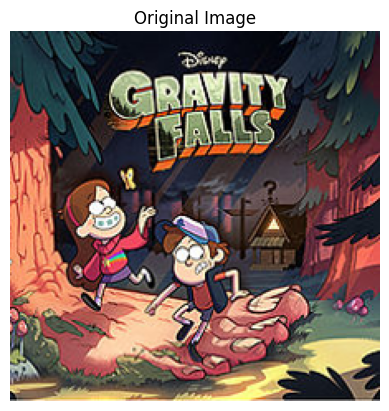

In [ ]:
#configs
image_path = './Gravity Falls/correct/0.png' 
GAUSSIAN_KERNEL_SIZE = (5, 5)
SOBEL_KERNEL_SIZE = 3
CANNY_T_LOW = 50       #Lower threshold adjusted for potentially better results
CANNY_T_HIGH = 150     #(keeping 1:3 ratio)


image = cv2.imread(image_path)

#Opencv default is bgr (must be converted to rgb)
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

plt.imshow(image_rgb)
plt.title('Original Image')
plt.axis('off')
plt.show()

## 3. Processing Steps

In [14]:
#1 Convert to Grayscale
image_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

#2 Gaussian Filter
image_blurred = cv2.GaussianBlur(image_gray, GAUSSIAN_KERNEL_SIZE, 0)

#3 Sobel Edge Operator + normalize sobel magnitude for display
sobel_x = cv2.Sobel(image_blurred, cv2.CV_64F, 1, 0, ksize=SOBEL_KERNEL_SIZE)
sobel_y = cv2.Sobel(image_blurred, cv2.CV_64F, 0, 1, ksize=SOBEL_KERNEL_SIZE)
sobel_combined = cv2.magnitude(sobel_x, sobel_y)
sobel_normalized = cv2.normalize(sobel_combined, None, 0, 255, cv2.NORM_MINMAX)
sobel_normalized = np.uint8(sobel_normalized)

#4 Canny Edge Process
edges = cv2.Canny(image_blurred, threshold1=CANNY_T_LOW, threshold2=CANNY_T_HIGH)

## Visualization

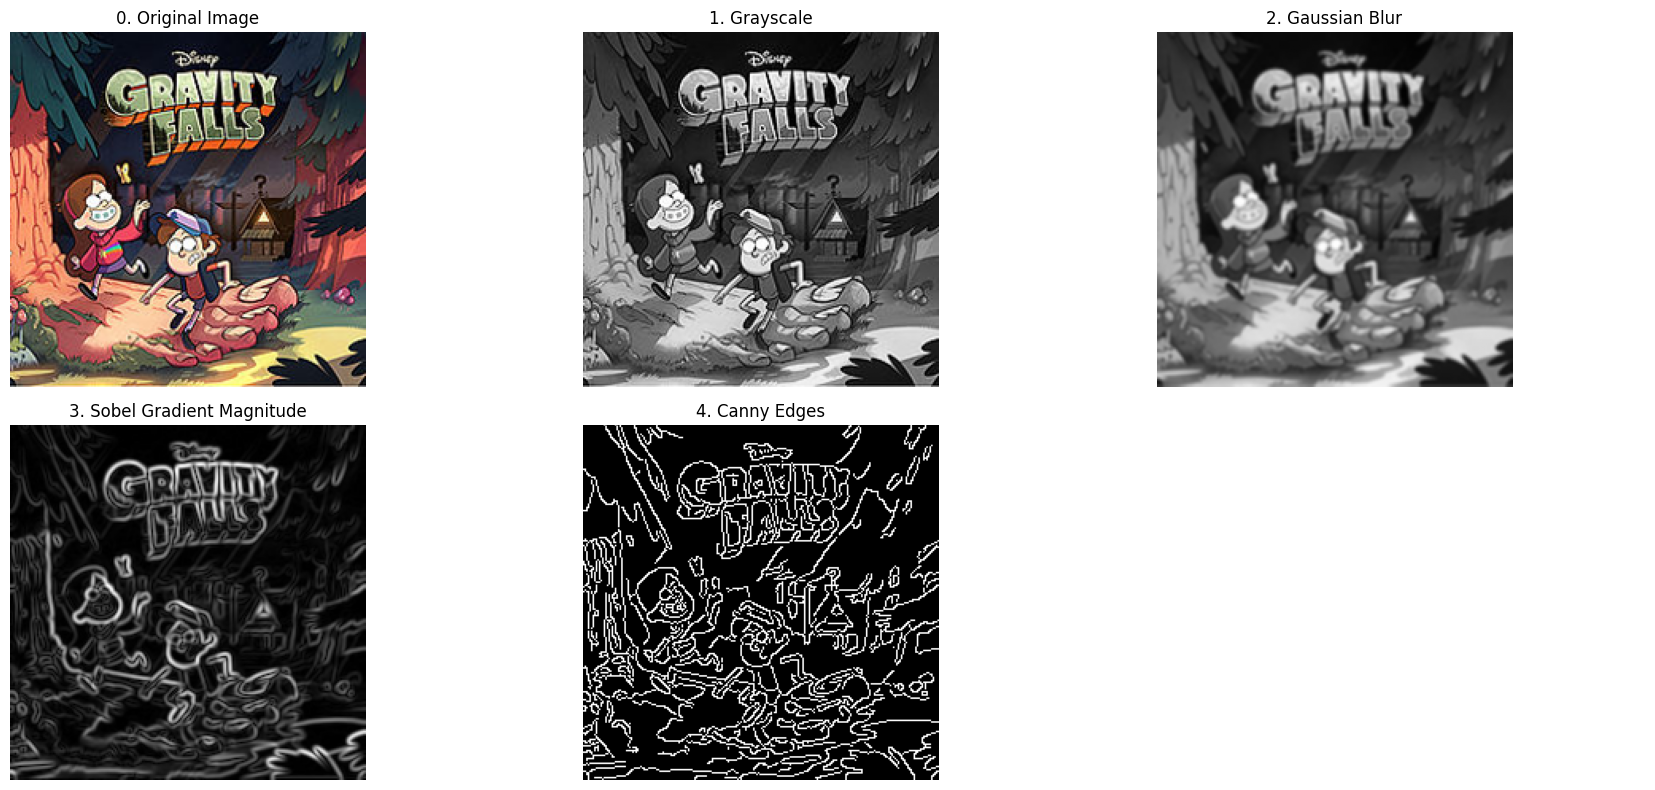

In [15]:

plt.figure(figsize=(18, 8)) 

plots = {
    1: {'data': image_rgb, 'title': '0. Original Image', 'cmap': None},
    2: {'data': image_gray, 'title': '1. Grayscale', 'cmap': 'gray'},
    3: {'data': image_blurred, 'title': '2. Gaussian Blur', 'cmap': 'gray'},
    4: {'data': sobel_normalized, 'title': '3. Sobel Gradient Magnitude', 'cmap': 'gray'},
    5: {'data': edges, 'title': '4. Canny Edges', 'cmap': 'gray'},
}

for i, (key, p) in enumerate(plots.items()):
    plt.subplot(2, 3, key)
    plt.imshow(p['data'], cmap=p['cmap'])
    plt.title(p['title'])
    plt.axis('off')

plt.subplot(2, 3, 6)
plt.axis('off')

plt.tight_layout()
plt.show()